In [1]:
# Import the full met.ie dataset (downloaded from https://www.met.ie/climate/available-data/historical-data)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.optimize import *
import numpy as np
import math


In [2]:
# some functions - HOLD

  

In [3]:
# Read in the datafile
all_data_df = pd.read_csv("data/Athenry_met/hly1875.csv", skiprows=17)


In [4]:
all_data_df.columns.values

array(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype=object)

In [5]:
# set index to be datetime
all_data_df['datetime'] = pd.to_datetime(all_data_df['date'])
all_data_df = all_data_df.set_index(all_data_df['datetime'])
all_data_df.drop(columns=['date'], inplace=True)

In [6]:
# Taking the data since 2015 to end 2022
time_start = "2015-01-01 00:00:00"
time_end = "2022-12-31 23:00:00"
# data_df is the time period to analyse
data_df = all_data_df.loc[time_start : time_end].copy()
data_df


,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,datetime
datetime,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0,0.0,0,8.3,0,7.2,5.9,9.3,84,1019.7,2,9,2,210,2015-01-01 00:00:00
2015-01-01 01:00:00,0,0.0,0,8.3,0,7.2,5.8,9.2,84,1019.5,2,10,2,200,2015-01-01 01:00:00
2015-01-01 02:00:00,0,0.0,0,8.2,0,7.1,5.8,9.2,84,1018.8,2,10,2,210,2015-01-01 02:00:00
2015-01-01 03:00:00,0,0.0,0,9.3,0,7.7,5.7,9.2,78,1018.1,2,11,2,200,2015-01-01 03:00:00
2015-01-01 04:00:00,0,0.0,0,9.6,0,8.3,6.7,9.8,81,1016.6,2,9,2,200,2015-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0,0.0,0,4.4,0,4.2,4.0,8.1,96,992.9,2,3,2,40,2022-12-31 19:00:00
2022-12-31 20:00:00,0,0.0,0,4.5,0,4.3,4.1,8.2,97,993.4,2,1,2,50,2022-12-31 20:00:00
2022-12-31 21:00:00,0,0.0,0,4.6,0,4.4,4.2,8.2,96,994.0,2,3,2,30,2022-12-31 21:00:00


In [7]:
# Some initial data investigation
#data_2021_df = data_2021_df.fillna(np.nan)
# replace blankspace with nan - https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas
data_df = data_df.replace(r'^\s+$', np.nan, regex=True)


In [8]:
# Take 4 met variables - hourly rainfall, temperature, sealevel pressure and predominant wind direction
# convert the 4 chosen variables to float
data_df['rain'] = data_df['rain'].astype(float)
data_df['temp'] = data_df['temp'].astype(float)
data_df['msl'] = data_df['msl'].astype(float)
data_df['wddir'] = data_df['wddir'].astype(float)
data_df['rhum'] = data_df['rhum'].astype(float)
# create a smaller dataframe
mydata_df = data_df[['rain', 'temp', 'msl', 'wddir', 'rhum', 'datetime']].copy()


# Plots of 8 years of hourly met data at Athenry weather station (2015-2022)
- Histogram of data for rainfall is highly skewed towards 0, i.e., there are many hours where there is no rain
- Histogram of temperature appears to be normally distributed.
- Histogram of pressure similarly appears to be approximately normally distributed with a skew towards lower pressure - requires more research.

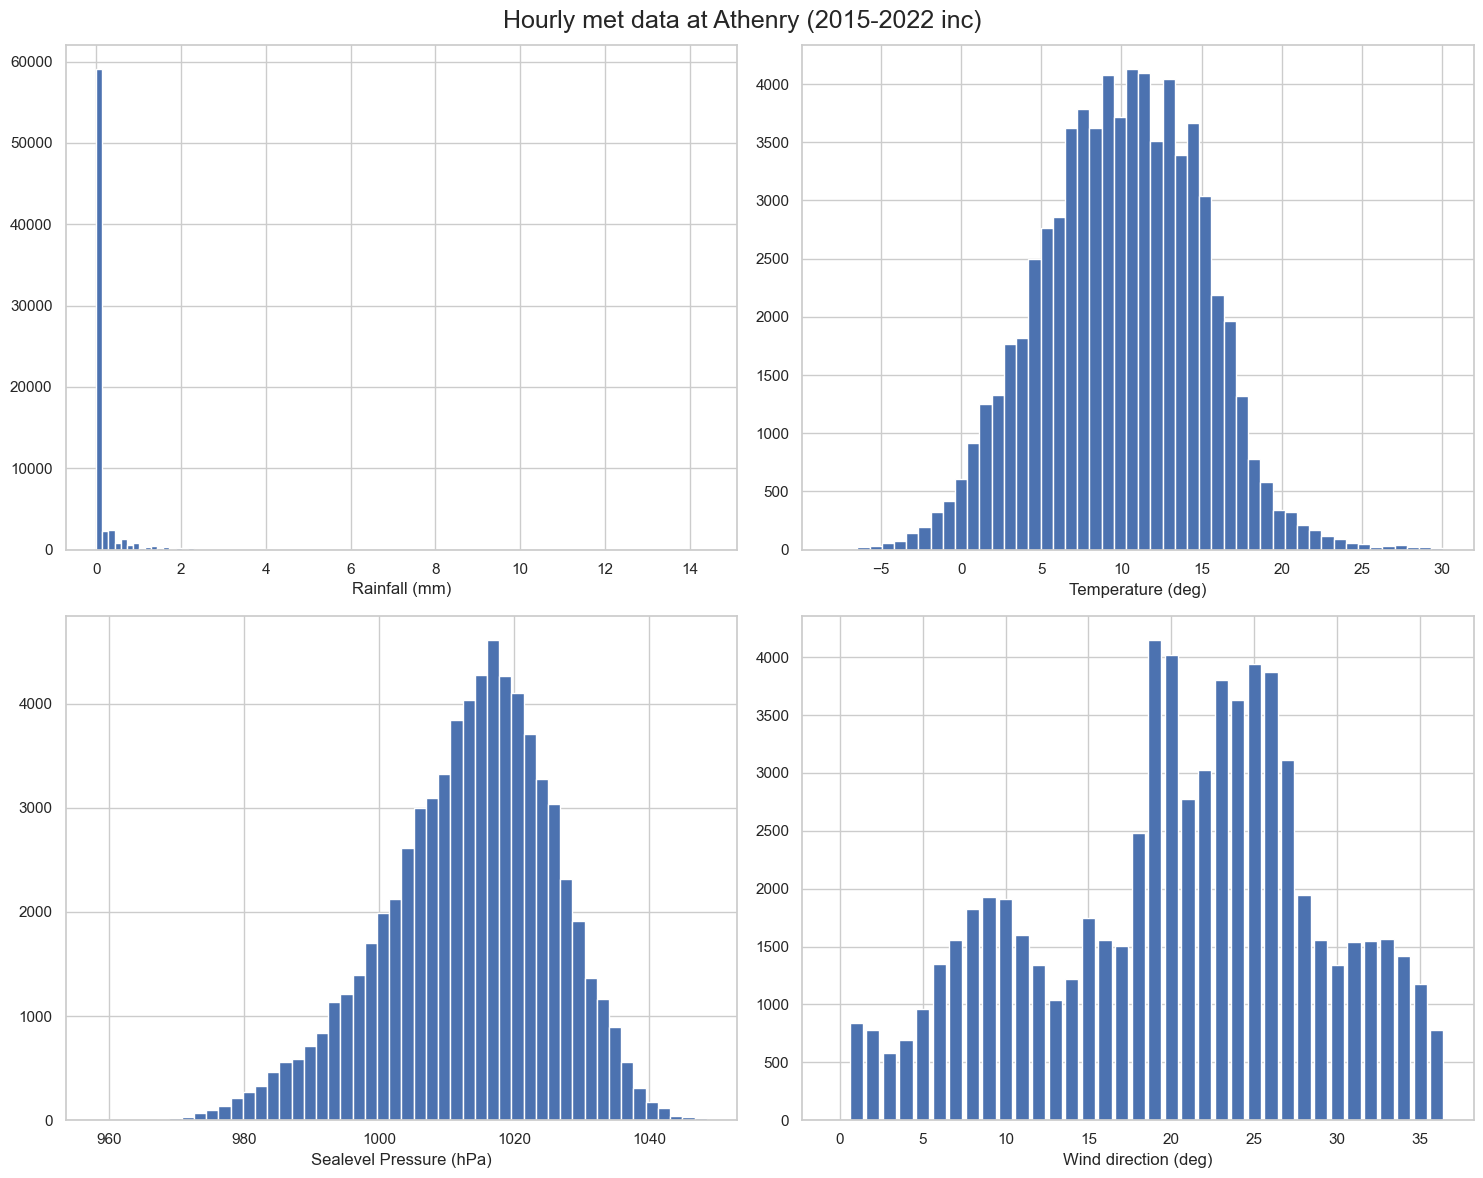

In [36]:
# Plots of the 8 year dataset for the 4 chosen variables
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Hourly met data at Athenry (2015-2022 inc)", fontsize=18)
axs[0,0].hist(data_df['rain'], bins=100)
axs[0,0].set_xlabel('Rainfall (mm)', fontsize=12)
axs[0,1].hist(data_df['temp'], bins=50)
axs[0,1].set_xlabel('Temperature (deg)', fontsize=12)
axs[1,0].hist(data_df['msl'], bins=50)
axs[1,0].set_xlabel('Sealevel Pressure (hPa)', fontsize=12)
labels = np.arange(0, 370, 10).tolist()

wind_dict = {}
for key in labels:
  wind_dict[key] = data_df['wddir'].reset_index(drop=True).to_list().count(key)
axs[1,1].bar(range(len(labels)), wind_dict.values())
axs[1,1].set_xlabel('Wind direction (deg)', fontsize=12)

plt.tight_layout()
plt.show()


Daily aggregation of the data gives a daily snapshot of the weather. A correlation table shows highest correlation to be between between atmospheric pressure (msl) and rainfall amounts (-0.45).

As weather is seasonal, a seasonal correlation between these 4 variables would perhaps be more meaningful.

In [10]:
# Aggregate the data based on daily mean or sum (in the case of rainfall)
mydata_agg = pd.DataFrame()
mydata_agg['Rainfall sum'] = data_df[['rain', 'datetime']].groupby(pd.Grouper(key='datetime', freq='D')).sum()
mydata_agg['Temp mean'] = data_df[['temp', 'datetime']].groupby(pd.Grouper(key='datetime', freq='D')).mean()
mydata_agg['Msl mean'] = data_df[['msl', 'datetime']].groupby(pd.Grouper(key='datetime', freq='D')).mean()
mydata_agg['rhum mean'] = data_df[['rhum', 'datetime']].groupby(pd.Grouper(key='datetime', freq='D')).mean()
mydata_agg['wddir mean'] = data_df[['wddir', 'datetime']].groupby(pd.Grouper(key='datetime', freq='D')).mean()



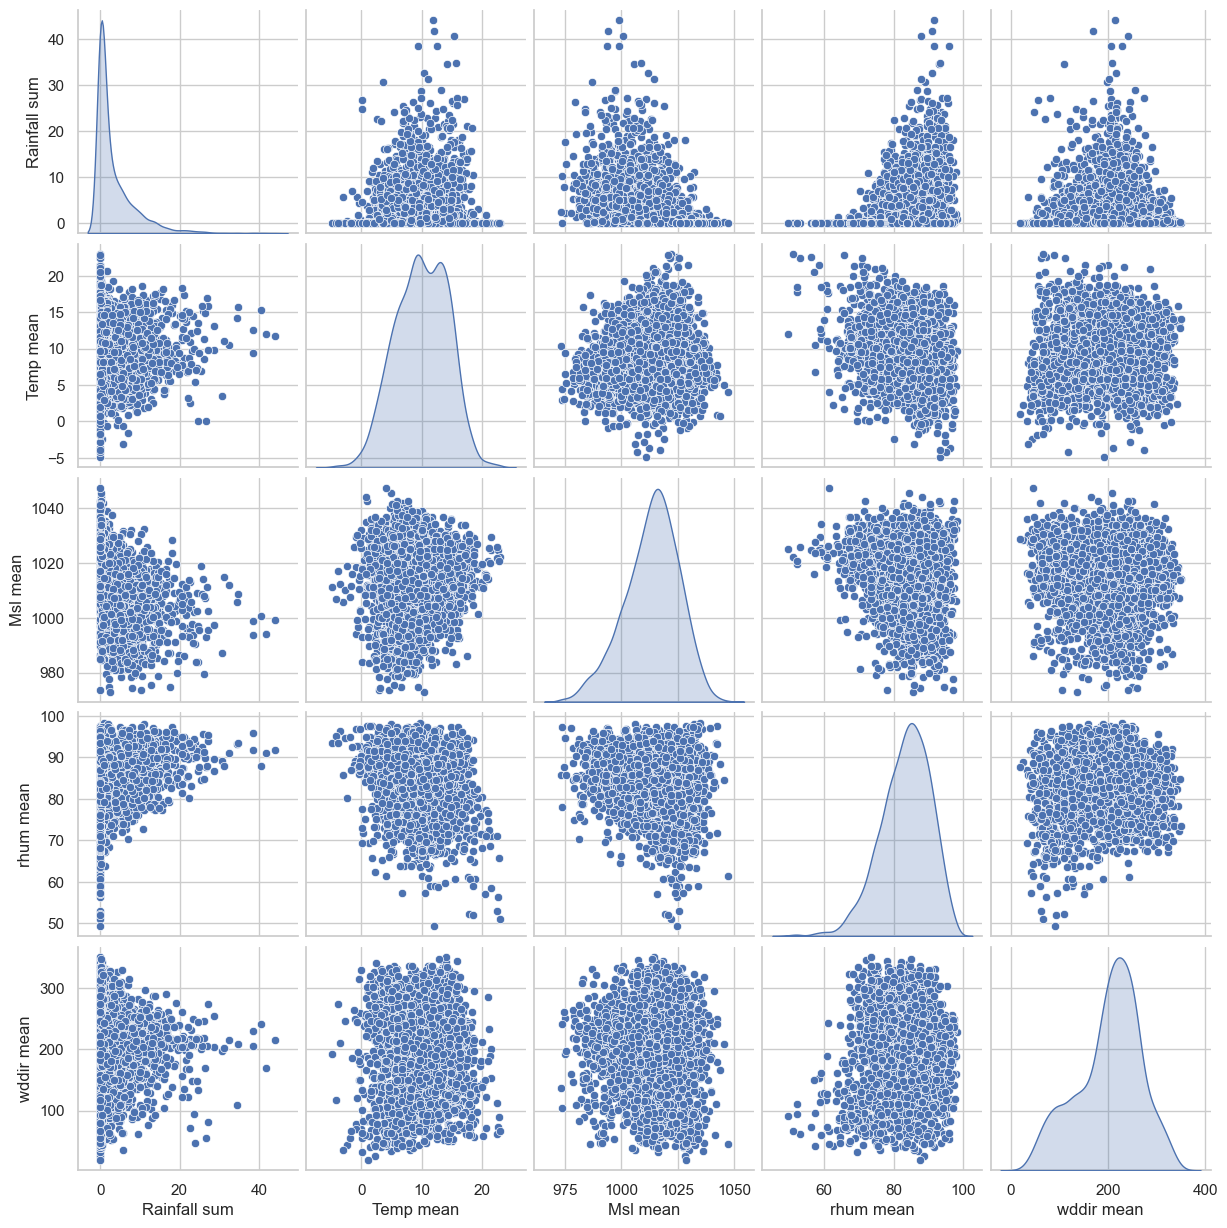

In [11]:
# Create a pairplot of the data
sns.set_theme(style='whitegrid')
g = sns.pairplot(mydata_agg, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=7, color=".2")
#g.savefig(f"{plots_folder}/scatter_pairplot.png")
plt.show()

## Correlation between meteorological measurements (aggregated)
In order to investigate correlation between the data variables, the data is split into seasons (where meteorological winter is December to February inclusive, and so on). The Pearson correlation method in pandas is applied to the data (by season).

There is no strong correlation between any of the data variables investigated as part of this study. The strongest correlation across all seasons is the negative correlation between rainfall and pressure level which ranges from -0.42 to -0.49 across all seasons.  Correlation values greater or less than 0.3 and -0.3 respecitvley are highlighted in the tables below. 

Spring and summer show more correlation between the meteorological variables than autumn and winter.

In [12]:
# Call a function to split the data and return data based on a season
def split_seasons(df_to_split, months):
  season_df = pd.DataFrame()
  for month in months:
    month_loc = df_to_split['datetime'].dt.month.between(month, month)
    season_df = pd.concat([season_df, df_to_split.loc[month_loc]])
  return season_df


def get_corr(data):
    return data.corr()

# assigns a season class to the data to allow for referencing of data without splitting dataframe
def assign_season_class(the_data, the_class, months):
  for month in months:
    month_loc = the_data['datetime'].dt.month.between(month, month)
    the_data.loc[month_loc, 'season'] = the_class
  return the_data

# define a styler
def my_styler(df, precision, caption):
    df_styler = df.style.format(precision=precision).set_caption(caption)
    return df_styler 

def styler_highlight_between(df_styler, left, right):
    print(f"{left} {right}")
    df_styler = df_styler.highlight_between(color="#fffd75", left=left, right=right, inclusive='both') 
    return df_styler

# put datetime back as a variable
# https://sparkbyexamples.com/pandas/pandas-set-index-to-column-in-dataframe/
mydata_agg_i = mydata_agg.reset_index()
winter_months = [12, 1, 2]
spring_months = [3, 4, 5]
summer_months = [6, 7, 8]
autumn_months = [9, 10, 11]
# assign a new variable "season" to the data
mydata_agg_i['season'] = ''
mydata_agg_i = assign_season_class(mydata_agg_i, 'winter', winter_months)
mydata_agg_i = assign_season_class(mydata_agg_i, 'spring', spring_months)
mydata_agg_i = assign_season_class(mydata_agg_i, 'summer', summer_months)
mydata_agg_i = assign_season_class(mydata_agg_i, 'autumn', autumn_months)

class_names = ['winter', 'spring', 'summer', 'autumn']  # to allow looping over seasons

corr_styler_list = []
#mydata_agg_i.drop(columns = ["season", "datetime"]) 
df_corr =  get_corr(mydata_agg_i.drop(columns = ["season", "datetime"]))    
df_styler = my_styler(df_corr, 2,  "Correlation - all data")
df_styler = styler_highlight_between(df_styler, 0.3, 0.99)
df_styler = styler_highlight_between(df_styler, -0.99, -0.3)
display(df_styler)


# Get correlation matrices for the 4 seasons and display
for i, item in enumerate(class_names):
    # Extract the data related to one season
    season_data = mydata_agg_i[mydata_agg_i["season"] == item].copy()
    # Strip the class column before passing to function
    season_data.drop(columns = ["season", "datetime"], inplace=True) 
    df_corr =  get_corr(season_data)      
    df_styler = my_styler(df_corr, 2, item + " Correlation")
    df_styler = styler_highlight_between(df_styler, 0.3, 0.99)
    df_styler = styler_highlight_between(df_styler, -0.99, -0.3)
    corr_styler_list.append(df_styler)
    
for item in corr_styler_list:
    display(item)



0.3 0.99
-0.99 -0.3


,Rainfall sum,Temp mean,Msl mean,rhum mean,wddir mean
Rainfall sum,1.00,0.02,-0.45,0.35,0.05
Temp mean,0.02,1.00,0.10,-0.18,0.02
Msl mean,-0.45,0.10,1.00,-0.22,-0.06
rhum mean,0.35,-0.18,-0.22,1.00,0.06
wddir mean,0.05,0.02,-0.06,0.06,1.00


0.3 0.99
-0.99 -0.3
0.3 0.99
-0.99 -0.3
0.3 0.99
-0.99 -0.3
0.3 0.99
-0.99 -0.3


,Rainfall sum,Temp mean,Msl mean,rhum mean,wddir mean
Rainfall sum,1.00,0.22,-0.45,0.09,0.10
Temp mean,0.22,1.00,-0.00,-0.00,0.03
Msl mean,-0.45,-0.00,1.00,0.04,-0.12
rhum mean,0.09,-0.00,0.04,1.00,-0.07
wddir mean,0.10,0.03,-0.12,-0.07,1.00


,Rainfall sum,Temp mean,Msl mean,rhum mean,wddir mean
Rainfall sum,1.00,-0.11,-0.49,0.46,0.14
Temp mean,-0.11,1.00,0.15,-0.13,-0.11
Msl mean,-0.49,0.15,1.00,-0.32,-0.08
rhum mean,0.46,-0.13,-0.32,1.00,0.26
wddir mean,0.14,-0.11,-0.08,0.26,1.00


,Rainfall sum,Temp mean,Msl mean,rhum mean,wddir mean
Rainfall sum,1.00,-0.05,-0.48,0.50,-0.09
Temp mean,-0.05,1.00,0.13,-0.12,-0.38
Msl mean,-0.48,0.13,1.00,-0.37,0.01
rhum mean,0.50,-0.12,-0.37,1.00,0.03
wddir mean,-0.09,-0.38,0.01,0.03,1.00


,Rainfall sum,Temp mean,Msl mean,rhum mean,wddir mean
Rainfall sum,1.00,0.17,-0.42,0.29,0.03
Temp mean,0.17,1.00,0.01,-0.03,-0.03
Msl mean,-0.42,0.01,1.00,-0.13,-0.03
rhum mean,0.29,-0.03,-0.13,1.00,-0.10
wddir mean,0.03,-0.03,-0.03,-0.10,1.00


In [13]:
#mydata_agg_i = mydata_agg_i.assign(season=[])

print(mydata_agg_i.iloc[1000])

datetime        2017-09-27 00:00:00
Rainfall sum                   18.6
Temp mean                      13.2
Msl mean                  1008.9125
rhum mean                 91.791667
wddir mean               173.333333
season                       autumn
Name: 1000, dtype: object


# Rainfall distribution - Analysis and Synthesisation
- Rainfall over a period of time can follow an exponential distribution [https://www.realclimate.org/index.php/archives/2017/11/a-brief-review-of-rainfall-statistics/] when the 0 rainfall periods are removed.
- Taking the daily aggregated data, the frequency of rainy days, fw, is calculated by classifying a "rainy" day as one in which the total rainfall is >1mm.  
- From 8 years of data, the frequency of rainy days is approximately 0.5, i.e., So 1 in 2 days has rainfall overall.
- For the days that are classified as rainy, the mean daily rainfall is 6.7mm
- It is possible to generate data for 1 year to synthesise daily rainfall totals by the following:
    -- generate some random data based on the exponential distribution parameters which describe the rainfall daily total distribution. The size of the random data is based on the frequency of rainy days, fw, multiplied by the total number of days of required data. 
- The number of dry days is found by subtracting rainy days from the total number of days and a value of 0 is assigned.
- The 2 arrays are joined together and then shuffled randomly.
- It would perhaps be more meaningful to find a distribution for each season and generate synthesised data on a season basis.
- The synthesised data when generated for a 1 year period does not accurately capture the probability of having higher values. It would perhaps be better to synthesise a larger set and then 
 
  
 https://stackoverflow.com/questions/2896179/fitting-a-gamma-distribution-with-python-scipy
 - [https://en.wikipedia.org/wiki/Gamma_distribution]
 https://www.geeksforgeeks.org/how-to-do-exponential-and-logarithmic-curve-fitting-in-python/

23


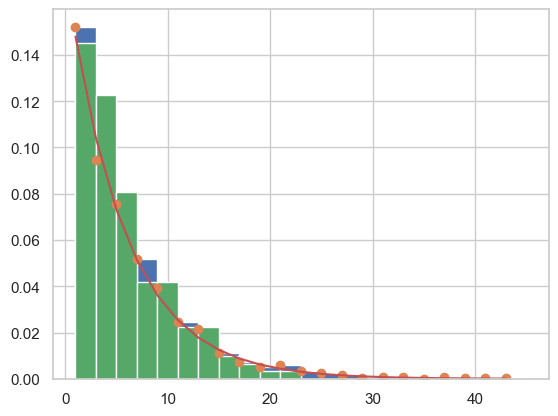

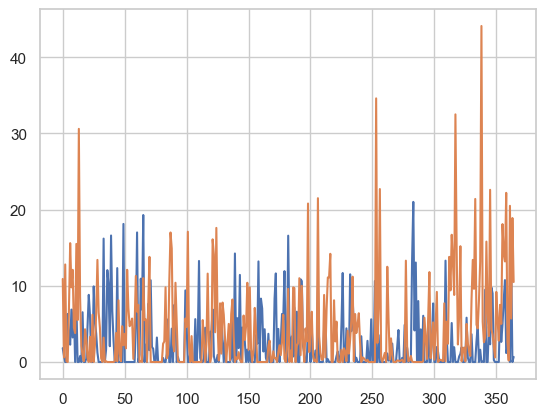

In [14]:
# Do some analysis on the daily aggregated rainfall data over 8 years.

rainfall_df = mydata_agg_i[['Rainfall sum', 'datetime']]
rainfall_df = rainfall_df.set_index('datetime')
max_rain = rainfall_df['Rainfall sum'].max()
min_rain = rainfall_df['Rainfall sum'].min()
# frequency of rainy days with criterion of >1mm rainfall in a day
fw = (rainfall_df['Rainfall sum']>1).sum() / len(rainfall_df)
daily_rain_rainydays = rainfall_df[rainfall_df['Rainfall sum']>1]
bin_size = 2
daily_rain_rainydays_floor = math.floor(daily_rain_rainydays.min())
daily_rain_rainydays_ceiling = math.ceil(daily_rain_rainydays.max())

# returns the normalised data for the histogram (area under curve =1)
bins = np.arange(daily_rain_rainydays_floor, daily_rain_rainydays_ceiling+bin_size, bin_size)
n, bins_returned, patches = plt.hist(daily_rain_rainydays, bins=bins, density=True)
print(len(bins))

# get a list of the midpoints for each bin for curve fitting
bin_mid = []
for i in range(len(bins[:-1])):
  bin_mid.append((bins[i]+bins[i+1])/2)

#bin_mid = np.array(bin_mid)

bin_mid = np.array(bins[:-1])
bin_start = np.array(bins[:-1])

plt.plot(bin_mid, n, 'o')

# Use curve_fit method as in: https://stackoverflow.com/questions/50448199/lognormal-curve-fit
# PDF for the exponential distribution - so that curve fitting can be done
def f_exp(bin_mid, lamda_1):
  return lamda_1*np.exp(-1*lamda_1*bin_mid)

params, extras = curve_fit(f_exp, bin_mid, n)

# fit a exponential curve
lamda_1 = params[0]
pdf_expon = (lamda_1*np.exp(-1*lamda_1*bin_mid))

plt.plot(bin_mid, pdf_expon, 'r')


# set up a random generator for exponential distribution
# https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.exponential.html
# generate 1 year of daily rainfall totals - assuming that the frequency of rainy days calculated above
random_daily_rainfall_1yr = np.random.default_rng().exponential(1/lamda_1, int(365*fw))
plt.hist(random_daily_rainfall_1yr, bins=bins, density=True)
plt.show()

no_rainfall_days = int(fw * 365)
daily_non_rainfall_1yr = np.array((365-no_rainfall_days)*[0])

year_rainfall_syn_data = np.concatenate((random_daily_rainfall_1yr, daily_non_rainfall_1yr))

np.random.shuffle(year_rainfall_syn_data)

plt.plot(year_rainfall_syn_data)
plt.plot(mydata_agg_i['Rainfall sum'][0:365])


# Synthesising msl (pressure)
- From above, the distribution of pressure is skewed to the left.
- From looking at 

- 



Text(0.5, 0, 'Pressure - autumn')

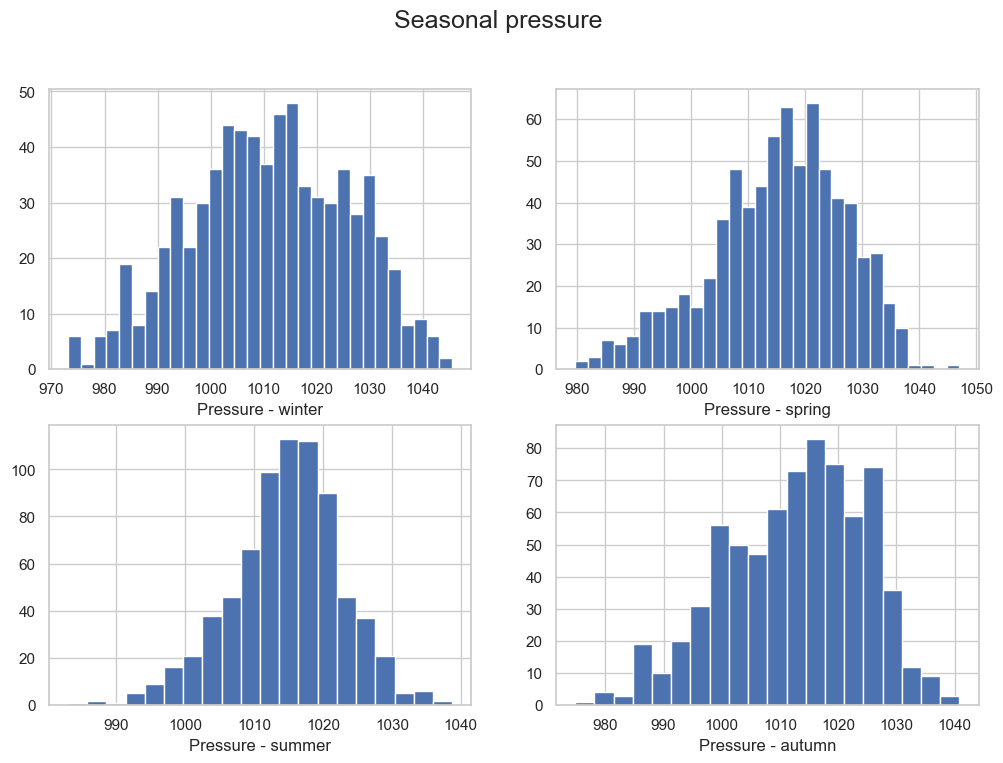

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Seasonal pressure", fontsize=18)
axs[0,0].hist(mydata_agg_i['Msl mean'].loc[mydata_agg_i['season']=="winter"], bins=30)
axs[0,0].set_xlabel('Pressure - winter', fontsize=12)
axs[0,1].hist(mydata_agg_i['Msl mean'].loc[mydata_agg_i['season']=="spring"], bins=30)
axs[0,1].set_xlabel('Pressure - spring', fontsize=12)
axs[1,0].hist(mydata_agg_i['Msl mean'].loc[mydata_agg_i['season']=="summer"], bins=20)
axs[1,0].set_xlabel('Pressure - summer', fontsize=12)
axs[1,1].hist(mydata_agg_i['Msl mean'].loc[mydata_agg_i['season']=="autumn"], bins=20)
axs[1,1].set_xlabel('Pressure - autumn', fontsize=12)



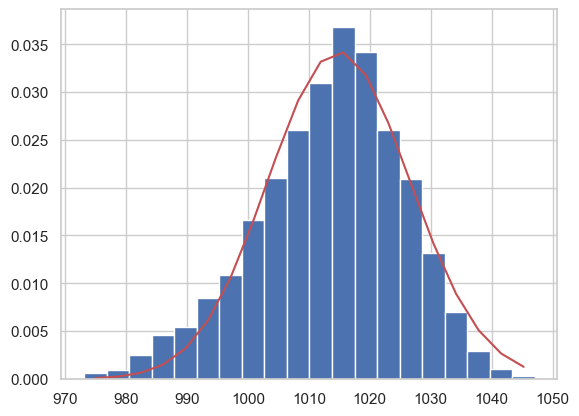

In [24]:
#n, bins_returned, patches = plt.hist(mydata_agg_i['Msl mean'].loc[mydata_agg_i['season']=="summer"], bins=20, density=True)
n, bins_returned, patches = plt.hist(mydata_agg_i['Msl mean'], bins=20, density=True)


# function to find the midpoint of a array of bins
def mean_bins(given_bins):
  bins = []
  for i in range(len(given_bins[:-1])):
    bins.append((given_bins[i]+given_bins[i+1])/2)
  return np.array(bins)

bins = mean_bins(bins_returned)


# https://en.wikipedia.org/wiki/Log-normal_distribution
def f_lognormal(x, mu, sigma):
  return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-mu)**2)/(2*sigma**2))

# returns mu and sigma in params 
params, extras = curve_fit(f_lognormal, bins, n)

mu_pressure = params[0]
sigma_pressure = params[1]
# fit a lognormal curve
pdf_lognormal = f_lognormal(bins, mu_pressure, sigma_pressure)
plt.plot(bins, pdf_lognormal, 'r')
plt.show()


In [17]:
# Synthesise data for msl (pressure)
# https://numpy.org/devdocs/reference/random/generated/numpy.random.Generator.lognormal.html
# Generate 1 year of daily mean pressure data
random_daily_pressure_1yr= np.random.default_rng().lognormal(mean=mu_pressure, sigma=sigma_pressure, size = 365)

array([[ 1.        , -0.26111466],
       [-0.26111466,  1.        ]])

[1012.7        1027.48333333 1023.13333333 ...  993.22916667  983.8625
  991.7375    ]
[10.9  0.6 12.8 ...  7.9 24.2  5.4]
2922
2922


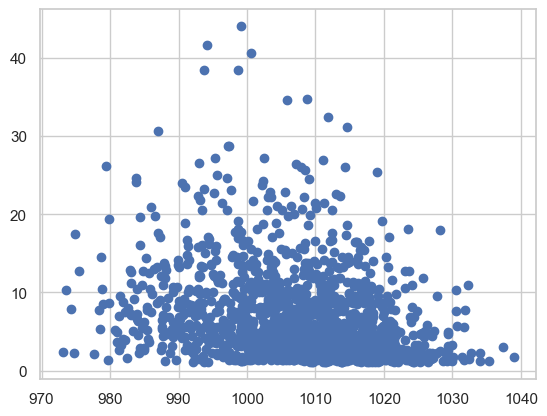

In [21]:

#mydata_agg_i['Msl mean'].loc[mydata_agg_i['Rainfall sum']>1]


#mydata_agg_i['Msl mean'].loc[mydata_agg_i['season']=="summer"]
# Getting the correlation coefficients between the daily mean pressure and the daily rainfall amount for the days that have >1mm rainfall.
r = np.corrcoef(mydata_agg_i['Msl mean'].loc[mydata_agg_i['Rainfall sum']>1], mydata_agg_i['Rainfall sum'].loc[mydata_agg_i['Rainfall sum']>1])

#df_styler = my_styler(r, 2, "Pressure/Rainfall correlation")

display(r)

print(np.array(mydata_agg_i['Msl mean']))
print(np.array(mydata_agg_i['Rainfall sum']))
print(np.array(mydata_agg_i['Msl mean']).size)
print(np.array(mydata_agg_i['Rainfall sum']).size)
plt.scatter(mydata_agg_i['Msl mean'].loc[mydata_agg_i['Rainfall sum']>1], mydata_agg_i['Rainfall sum'].loc[mydata_agg_i['Rainfall sum']>1]);
plt.show()
#print(mydata_agg_i['Msl mean'].size)

# Synthesising temperature data
The temperature distribution above shows a broadly normal distribution.  
The synthesised data histogram (for a population of 365 day), shows reasonable quantitative match with the actual data when a random normal distribution is generated.

It would make sense here to synthesise temperature based on seasons.



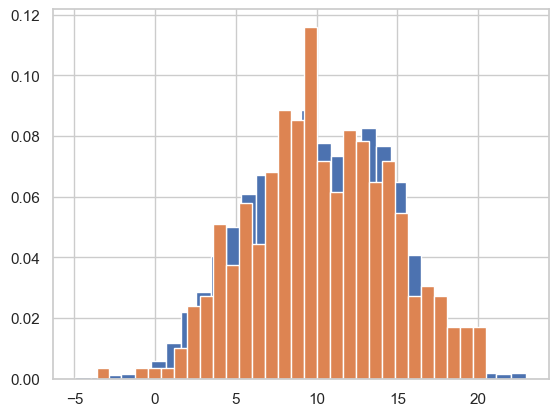

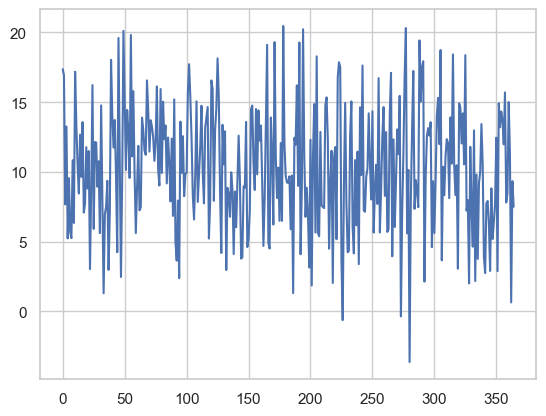

In [37]:
# Plotting the aggregated mean temperature data for Athenry 
no_bins = 30
n, bins_returned, patches = plt.hist(mydata_agg['Temp mean'], bins=no_bins, density=True);

bins = mean_bins(bins_returned)
# Get the mean and standard deviation of the data
mu = mydata_agg['Temp mean'].mean()
sigma = mydata_agg['Temp mean'].std()

temp_syn = np.random.normal(mu, sigma, size = 365)
plt.hist(temp_syn, bins=no_bins, density=True);
plt.show()

